<a href="https://colab.research.google.com/github/NelsonDavidGutierrez/mineria_Datos/blob/main/proyecto_Mineri_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, mean_squared_error
)
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

Paso 2 : Importar los datos

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

df = pd.read_csv(url, names=cols, na_values='?')
df_work = df.copy()
print("Dimensiones del dataset:", df_work.shape)
print("Primeras 5 filas:")
display(df_work.head())

Dimensiones del dataset: (303, 14)
Primeras 5 filas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Paso 3: Revisas Datos NAN


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


None


Estadísticos descriptivos (numéricos):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Valores faltantes por columna:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


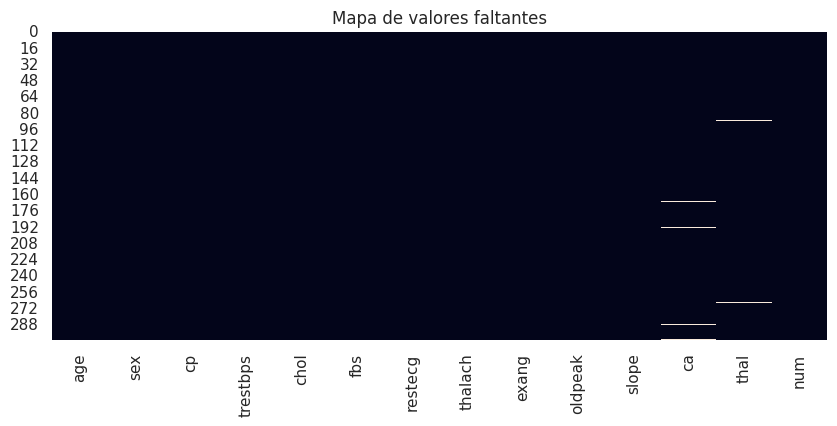

In [ ]:
print("\nInformación general:")
display(df_work.info())

print("\nEstadísticos descriptivos (numéricos):")
display(df_work.describe())

print("\nValores faltantes por columna:")
display(df_work.isna().sum())


plt.figure(figsize=(10,4))
sns.heatmap(df_work.isna(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

Paso 4: Limpieza

In [ ]:
for c in ["age","trestbps","chol","thalach","oldpeak","ca"]:

    pass


num_cols = df_work.select_dtypes(include=[np.number]).columns.tolist()
imputer_num = SimpleImputer(strategy="median")
df_work[num_cols] = imputer_num.fit_transform(df_work[num_cols])


if 'thal' in df_work.columns:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    df_work[['thal']] = imputer_cat.fit_transform(df_work[['thal']])


dup_count = df_work.duplicated().sum()
if dup_count > 0:
    print(f"Eliminando {dup_count} duplicados")
    df_work = df_work.drop_duplicates()

print("\nValores faltantes luego de imputación:")
display(df_work.isna().sum())


Valores faltantes luego de imputación:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Paso 5: Graficas para tendencias

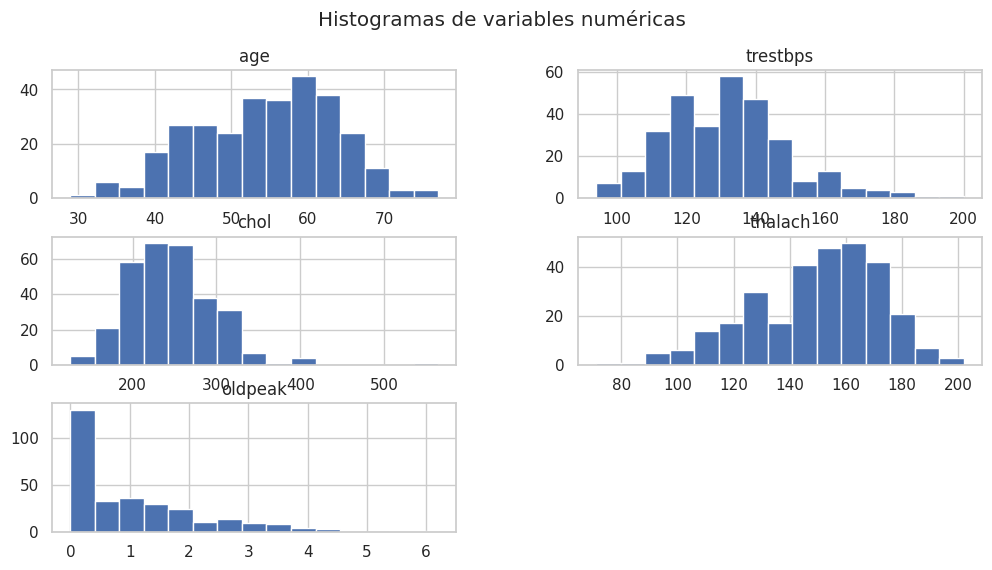

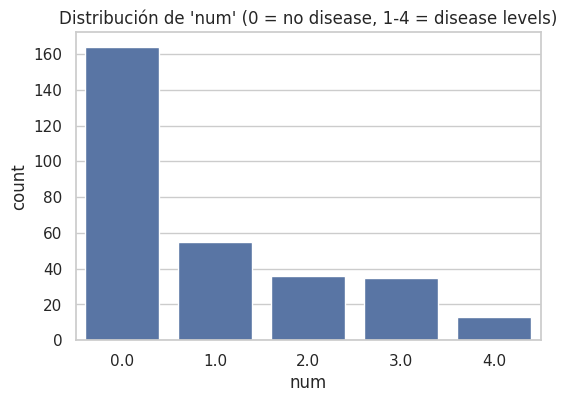

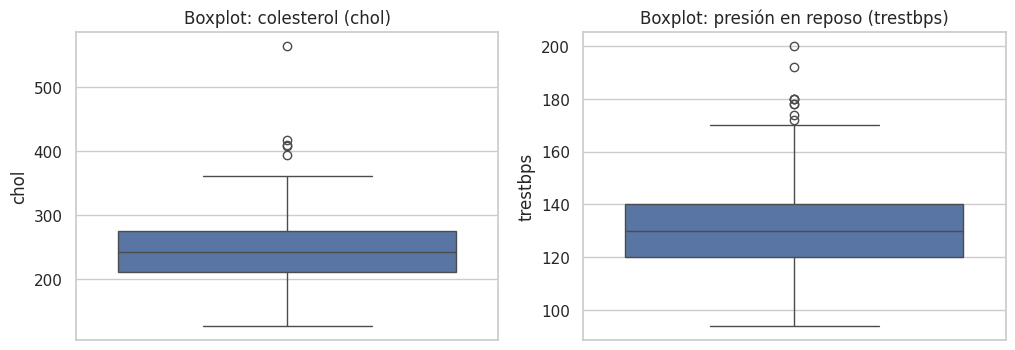

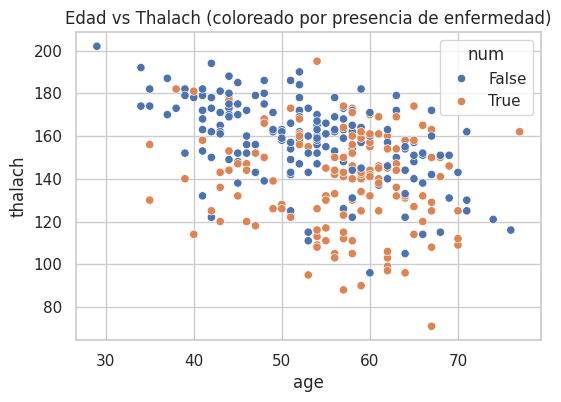

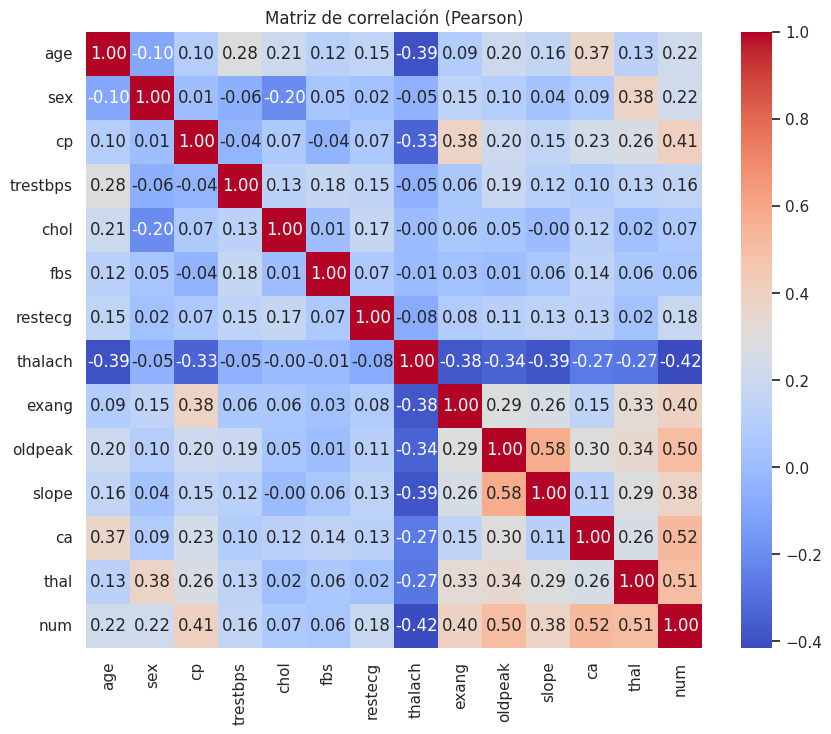

In [ ]:
num_features = ["age","trestbps","chol","thalach","oldpeak"]
df_work[num_features].hist(bins=15, figsize=(12,6))
plt.suptitle("Histogramas de variables numéricas")
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df_work)
plt.title("Distribución de 'num' (0 = no disease, 1-4 = disease levels)")
plt.show()


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=df_work['chol'])
plt.title("Boxplot: colesterol (chol)")
plt.subplot(1,2,2)
sns.boxplot(y=df_work['trestbps'])
plt.title("Boxplot: presión en reposo (trestbps)")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='thalach', hue=(df_work['num']>0), data=df_work)
plt.title("Edad vs Thalach (coloreado por presencia de enfermedad)")
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df_work.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de correlación (Pearson)")
plt.show()

Paso 6: Conversion variables a Numero

In [ ]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'sex', 'exang', 'fbs']
le = LabelEncoder()
df_enc = df_work.copy()
for c in categorical_cols:

    df_enc[c] = le.fit_transform(df_enc[c].astype(str))

print("\nVariables codificadas:")
display(df_enc.head())


Variables codificadas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,1,0.0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3.0,0,2.0
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,2,1.0
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,0,0.0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,0,0.0


Paso 7: Normalizacion

In [ ]:
df_enc['target'] = (df_enc['num'] > 0).astype(int)
X = df_enc.drop(['num','target'], axis=1)
y = df_enc['target']


X_raw = X.copy()


scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\nPrimeras filas de X escalado:")
display(X_scaled.head())


Primeras filas de X escalado:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.5
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0


Paso 8: Correlacion


Correlación de las variables con 'target' (ordenada):


,target
target,1.000000
thal,0.515894
ca,0.460033
exang,0.431894
oldpeak,0.424510
cp,0.414446
slope,0.339213
sex,0.276816
age,0.223120
restecg,0.169202


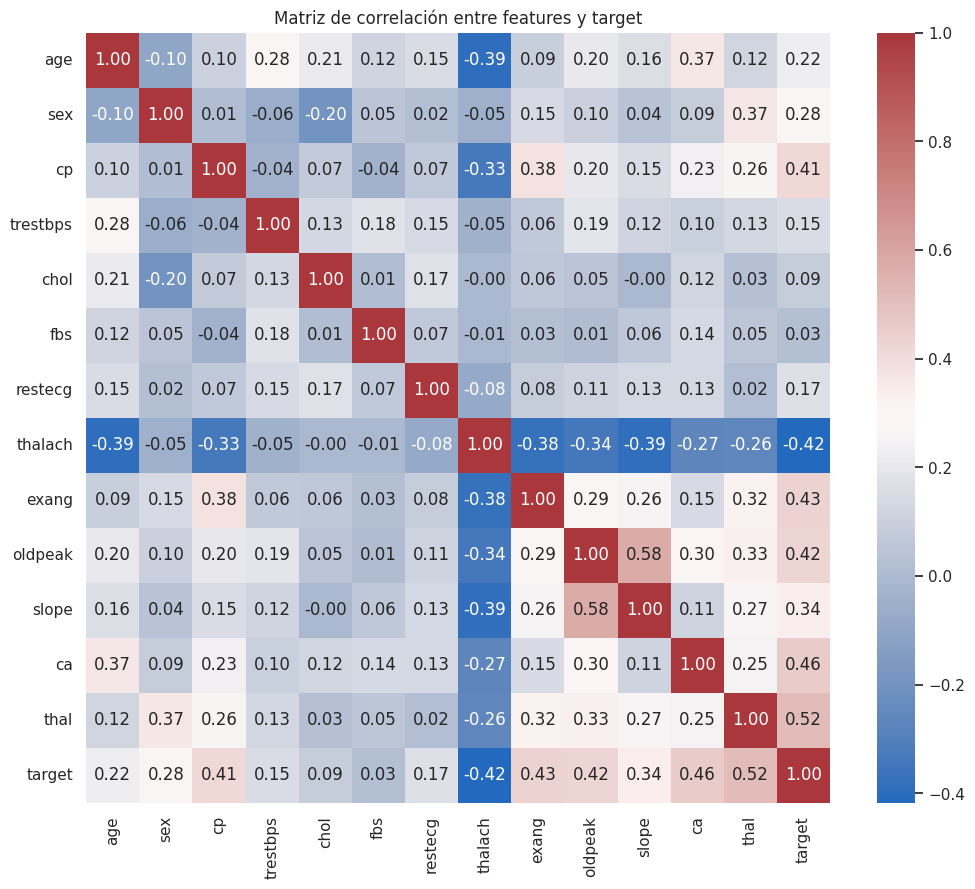

In [ ]:
corr_with_target = pd.concat([X_scaled, y], axis=1).corr()['target'].sort_values(ascending=False)
print("\nCorrelación de las variables con 'target' (ordenada):")
display(corr_with_target)


plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([X_scaled, y], axis=1).corr(), annot=True, fmt=".2f", cmap="vlag")
plt.title("Matriz de correlación entre features y target")
plt.show()

Paso 9: Test Normalidad

In [ ]:
shapiro_results = {}
for col in num_features:
    stat, p = shapiro(df_work[col])
    shapiro_results[col] = (stat, p)
print("\nResultados test de Shapiro-Wilk (statistic, p-value):")
for k,v in shapiro_results.items():
    print(f"{k}: statistic={v[0]:.4f}, p-value={v[1]:.4f}  -> {'normal' if v[1]>0.05 else 'no normal'}")




Resultados test de Shapiro-Wilk (statistic, p-value):
age: statistic=0.9865, p-value=0.0061  -> no normal
trestbps: statistic=0.9665, p-value=0.0000  -> no normal
chol: statistic=0.9473, p-value=0.0000  -> no normal
thalach: statistic=0.9765, p-value=0.0001  -> no normal
oldpeak: statistic=0.8442, p-value=0.0000  -> no normal


Paso 10: Pregunta Investigacion

In [ ]:
print("\nPregunta de investigación :")
print("¿Podemos predecir si un paciente tiene enfermedad cardíaca usando las variables clínicas disponibles?(sí/no)")


Pregunta de investigación :
¿Podemos predecir si un paciente tiene enfermedad cardíaca usando las variables clínicas disponibles?(sí/no)


Paso 11: Prediccion


--- Logistic Regression ---
Accuracy: 0.8524590163934426
ROC AUC: 0.9426406926406926
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


--- Random Forest ---
Accuracy: 0.9016393442622951
ROC AUC: 0.9561688311688312
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61


Mejor modelo según ROC_AUC: RandomForest


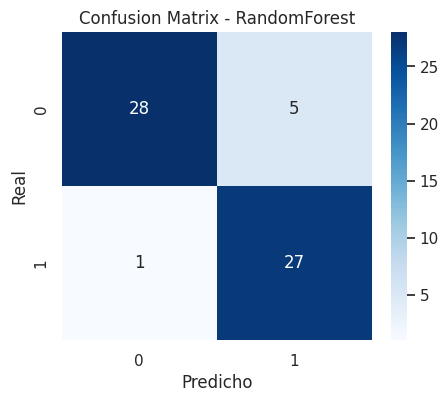

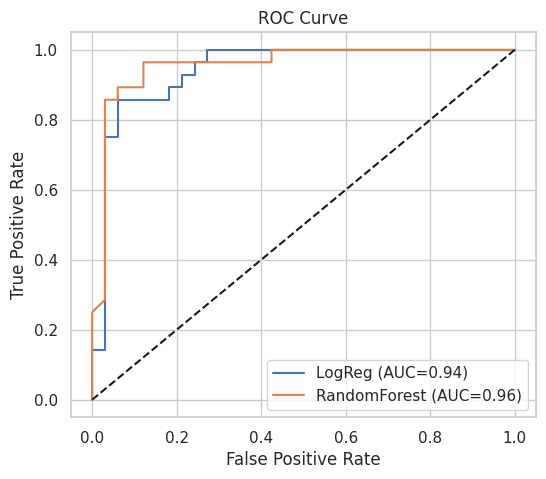


Importancia de características (RandomForest):


,0
thal,0.142406
thalach,0.122051
cp,0.115927
ca,0.105126
age,0.091680
oldpeak,0.089759
chol,0.086475
trestbps,0.080274
exang,0.053057
slope,0.042552



Resumen de métricas:
{'LogReg': {'accuracy': 0.8524590163934426, 'roc_auc': np.float64(0.9426406926406926)}, 'RandomForest': {'accuracy': 0.9016393442622951, 'roc_auc': np.float64(0.9561688311688312)}}

Script completado. Recomendaciones para la entrega:
- Incluir el notebook con los gráficos embebidos.
- Preparar la PPT con los 8 slides solicitados (usar los plots más relevantes).
- En 'Limitaciones' mencionar tamaño de la muestra, posibles sesgos y la imputación que se aplicó.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 2) Modelo 1: Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

# Métricas LR
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)
print("\n--- Logistic Regression ---")
print("Accuracy:", acc_lr)
print("ROC AUC:", roc_lr)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# 3) Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)
print("\n--- Random Forest ---")
print("Accuracy:", acc_rf)
print("ROC AUC:", roc_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 4) Matriz de confusión (mejor modelo)
best_model_name = 'RandomForest' if roc_rf >= roc_lr else 'LogisticRegression'
print(f"\nMejor modelo según ROC_AUC: {best_model_name}")

# Confusion matrix para el mejor modelo
best_pred = y_pred_rf if best_model_name=='RandomForest' else y_pred_lr
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# 5) Curva ROC comparativa
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC={roc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={roc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 6) Importancia de características (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
print("\nImportancia de características (RandomForest):")
display(importances.head(10))

# Guardar resultados resumidos
results = {
    'LogReg': {'accuracy': acc_lr, 'roc_auc': roc_lr},
    'RandomForest': {'accuracy': acc_rf, 'roc_auc': roc_rf}
}
print("\nResumen de métricas:")
print(results)

########################################
# Fin del script: imprimir instrucciones de entrega
########################################
print("\nScript completado. Recomendaciones para la entrega:")
print("- Incluir el notebook con los gráficos embebidos.")
print("- Preparar la PPT con los 8 slides solicitados (usar los plots más relevantes).")
print("- En 'Limitaciones' mencionar tamaño de la muestra, posibles sesgos y la imputación que se aplicó.")